# 4.Data Preparation of Lyrics II

Tasks to perform:

4.1. Create document-term matrix  
4.2. Find optimal number of topics using Coherence metric  
4.3. LDA Topic Modelling on extracted keywords  
4.4. Label topics  
4.5. Extract topic compositions of songs  

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random

# nlp modules
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

KeyboardInterrupt: 

In [ ]:
# read cleaned keywords df
songs_df = pd.read_csv('Data/spotify_sg_tokens_4.csv')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_id             1629 non-null   object 
 1   popularity          1629 non-null   float64
 2   title               1629 non-null   object 
 3   artist              1629 non-null   object 
 4   album/single        1629 non-null   object 
 5   artist_followers    1629 non-null   int64  
 6   explicit            1629 non-null   int64  
 7   album               1629 non-null   object 
 8   release_date        1629 non-null   object 
 9   danceability        1629 non-null   float64
 10  energy              1629 non-null   float64
 11  key                 1629 non-null   int64  
 12  loudness            1629 non-null   float64
 13  mode                1629 non-null   int64  
 14  speechiness         1629 non-null   float64
 15  acousticness        1629 non-null   float64
 16  instru

In [ ]:
# create doc-term matrix
def create_dtm(lyrics_list):
    corpus = [song.split(',') for song in lyrics_list]
    print(random.sample(corpus,1))
    id2word = corpora.Dictionary(corpus)
    doc_term_matrix = [id2word.doc2bow(doc) for doc in corpus]

    return corpus, id2word, doc_term_matrix

In [ ]:
# get topics
def get_topics(dtm, n_topics, id2word, passes, n_words):
    lda = gensim.models.ldamodel.LdaModel
    ldamodel = lda(corpus=dtm, num_topics=n_topics, id2word=id2word, passes=passes)
    topics = ldamodel.print_topics(num_topics=n_topics, num_words=n_words)
    return ldamodel, topics

In [ ]:
# get coherence values for multiple k

def compute_coherence_values(dictionary, corpus, texts, x_range, random_state):

    model_dict = {}
    lda = gensim.models.ldamodel.LdaModel
    for num_topics in x_range:
        print(num_topics)
        model = lda(corpus=corpus, 
                    num_topics=num_topics, 
                    id2word=dictionary, 
                    passes=20, 
                    iterations=100,
                    random_state=random_state)

        coherencemodel = CoherenceModel(model=model, 
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        cv = coherencemodel.get_coherence()
        
        model_dict[num_topics] = {}
        model_dict[num_topics]['model'] = model
        model_dict[num_topics]['cv'] = cv

    return model_dict

In [ ]:
# plot coherence values
def plot_coherence(values, x_range):
    plt.plot(x_range, values)
    plt.xlabel("Num Topics")
    plt.xticks(x_range)
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
# set song id to index
songs_df = songs_df.set_index('song_id')
songs_df.head(1)

popularity            title  \
song_id                                               
5xhJmd0I15jFcEdqxfCzKk       914.6  it wont kill ya   

                                           artist album/single  \
song_id                                                          
5xhJmd0I15jFcEdqxfCzKk  The Chainsmokers - Louane        album   

                        artist_followers  explicit                   album  \
song_id                                                                      
5xhJmd0I15jFcEdqxfCzKk          16931568         0  Memories...Do Not Open   

                       release_date  danceability  energy  ...    tempo  \
song_id                                                    ...            
5xhJmd0I15jFcEdqxfCzKk   2017-04-07         0.572    0.53  ...  170.138   

                        duration_ms  time_signature  genre  \
song_id                                                      
5xhJmd0I15jFcEdqxfCzKk       217613               4    pop   

                        days_since_release  top50_dummy  \
song_id                                                   
5xhJmd0I15jFcEdqxfCzKk                1314          0.0   

                                                                   lyrics  \
song_id                                                                     
5xhJmd0I15jFcEdqxfCzKk  I know as the night goes on,You might end up w...   

                                                               tokens_all  \
song_id                                                                     
5xhJmd0I15jFcEdqxfCzKk  know, night, go, might, someone, bite, tongue,...   

                                                             tokens_nouns  \
song_id                                                                     
5xhJmd0I15jFcEdqxfCzKk  night, tongue, lookin, room, stranger, time, m...   

                                 tokens_desc  
song_id                                       
5xhJmd0I15jFcEdqxfCzKk  much, little, longer  

[1 rows x 28 columns]

In [ ]:
lyrics_corpus, lyrics_id2word, lyrics_dtm = create_dtm(songs_df['tokens_all'].tolist())

[['best', ' music', ' another', ' one', ' khaled', ' celebrate', ' one', ' lost', ' celebrate', ' one', ' got', ' middle', ' finger', ' one', ' love', ' love', ' lost', ' celebrate', ' one', ' lost', ' celebrate', ' one', ' got', ' middle', ' finger', ' one', ' love', ' love', ' lost', ' people', ' tend', ' lose', ' see', ' comin', ' stupid', ' wish', ' bit', ' tongue', ' blood', ' burning', ' butane', ' know', ' keep', ' moving', ' got', ' stuck', ' printing', ' money', ' drive', ' jetta', ' since', ' cut', ' swear', ' life', ' better', ' nobody', ' believe', ' could', ' whatever', ' beefing', ' like', ' khaled', ' never', ' losing', ' sleep', ' gon', ' toast', ' toast', ' let', ' celebrate', ' one', ' lost', ' celebrate', ' one', ' got', ' middle', ' finger', ' one']]


In [ ]:
lyrics_dtm

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 3),
  (5, 3),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 4),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(5, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 2),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],
 [(18, 1),
  (21, 1),
  (38, 3),
  (41, 1),
  (66, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1

In [ ]:
# define range of k to iterate thru

x_range = range(6, 11, 1)
random_state = 10

lyrics_model_dict = compute_coherence_values(dictionary=lyrics_id2word, 
                                                        corpus=lyrics_dtm, 
                                                        texts=lyrics_corpus,
                                                        x_range=x_range,
                                                        random_state=random_state)

6
7
8
9
10


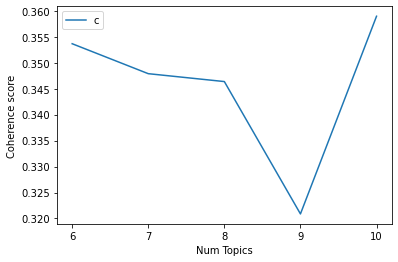

In [ ]:
# plot coherence scores per k
lyrics_cv = [v['cv'] for v in lyrics_model_dict.values()]
plot_coherence(lyrics_cv, x_range)

In [ ]:
# find optimal n topics
topic_coherence_map = dict(zip(x_range, lyrics_cv))

for n, cv in topic_coherence_map.items():
    print("Num Topics =", n, " has Coherence Value of", round(cv, 4))

# get optimal no of topics
optimal_n_topics = max(topic_coherence_map, key=topic_coherence_map.get)

optimal_n_topics = 6 # manual overwrite of optimal no of topics after inspection of topics
print(f'optimal number of topics: {optimal_n_topics}')


Num Topics = 6  has Coherence Value of 0.3537
Num Topics = 7  has Coherence Value of 0.3479
Num Topics = 8  has Coherence Value of 0.3464
Num Topics = 9  has Coherence Value of 0.3209
Num Topics = 10  has Coherence Value of 0.359
optimal number of topics: 6


In [ ]:
topic_coherence_df = pd.DataFrame(topic_coherence_map.items(),
                                    columns=['n_topics', 'coherence'])
topic_coherence_df.to_csv('Data/vis/topic_coherence.csv', index=False)

In [ ]:
optimal_model = lyrics_model_dict[optimal_n_topics]['model']
optimal_topics = optimal_model.print_topics(num_topics=optimal_n_topics, num_words=7)
for t in optimal_topics:
    print(t)

(0, '0.035*" like" + 0.029*" got" + 0.020*" bitch" + 0.018*" nigga" + 0.012*" fuck" + 0.011*" shit" + 0.010*" get"')
(1, '0.017*" like" + 0.015*" gon" + 0.012*" get" + 0.012*" got" + 0.010*" good" + 0.009*" girl" + 0.008*" let"')
(2, '0.031*" know" + 0.022*" let" + 0.015*" like" + 0.013*" one" + 0.011*" love" + 0.011*" need" + 0.010*" could"')
(3, '0.021*" love" + 0.019*" christmas" + 0.014*" bom" + 0.010*" like" + 0.007*" night" + 0.007*" still" + 0.006*" motivate"')
(4, '0.016*" low" + 0.011*" keep" + 0.008*" never" + 0.007*" runnin" + 0.007*" away" + 0.007*" know" + 0.006*" could"')
(5, '0.035*" know" + 0.029*" like" + 0.028*" love" + 0.025*" got" + 0.016*" time" + 0.015*" get" + 0.012*" see"')


In [ ]:
# find dominant topic

# One of the practical application of topic modeling is to determine what topic a given document is about.

# To find that, we find the topic number that has the highest percentage contribution in that document.

# The format_topics_sentences() function below nicely aggregates this information in a presentable table.

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    return sent_topics_df

In [ ]:
topic_docs_keywords = format_topics_sentences(ldamodel=optimal_model, 
                                                corpus=lyrics_dtm,
                                                texts=lyrics_corpus)

# Format
dominant_topics_df = topic_docs_keywords.reset_index()
dominant_topics_df.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
dominant_topics_df

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0               0             5.0              0.9746   
1               1             5.0              0.9838   
2               2             5.0              0.8559   
3               3             2.0              0.9753   
4               4             5.0              0.8167   
...           ...             ...                 ...   
1624         1624             2.0              0.9618   
1625         1625             2.0              0.8649   
1626         1626             2.0              0.8396   
1627         1627             2.0              0.5511   
1628         1628             2.0              0.9753   

                                               Keywords  \
0      know,  like,  love,  got,  time,  get,  see, ...   
1      know,  like,  love,  got,  time,  get,  see, ...   
2      know,  like,  love,  got,  time,  get,  see, ...   
3      know,  let,  like,  one,  love,  need,  could...   
4      know,  like,  love,  got,  time,  get,  see, ...   
...                                                 ...   
1624   know,  let,  like,  one,  love,  need,  could...   
1625   know,  let,  like,  one,  love,  need,  could...   
1626   know,  let,  like,  one,  love,  need,  could...   
1627   know,  let,  like,  one,  love,  need,  could...   
1628   know,  let,  like,  one,  love,  need,  could...   

                                                   Text  
0     [know,  night,  go,  might,  someone,  bite,  ...  
1     [star,  moon,  shine,  quite,  like,  dreamer,...  
2     [tell,  got,  getting,  light,  nobody,  home,...  
3     [let,  time,  tonight,  girl,  star,  place,  ...  
4     [sixteen,  sixteen,  remember,  moved,  mum,  ...  
...                                                 ...  
1624  [picture,  black,  white,  night,  sleep,  dre...  
1625  [got,  reputation,  neighborhood,  drive,  tem...  
1626  [minute,  spend,  minute,  mind,  guess,  need...  
1627  [pull,  side,  freeway,  clear,  flash,  tell,...  
1628  [steadier,  right,  ask,  ready,  sure,  told,...  

[1629 rows x 5 columns]

<AxesSubplot:xlabel='Dominant_Topic', ylabel='count'>

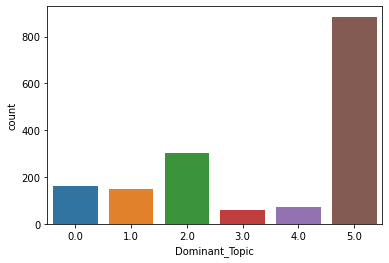

In [ ]:
# distibution of dominant topics
sns.countplot(x='Dominant_Topic', data=dominant_topics_df)

In [ ]:
# remove keywords that are common in other topics

topics = optimal_model.show_topics(formatted=False, 
                                    num_topics=optimal_n_topics, 
                                    num_words=50)

topic_words = [dict(t[1]) for t in topics]
all_topic_words = [list(t.keys()) for t in topic_words]

cleaned_topic_words = [] 
for tw in all_topic_words:
    remain_t = [t[:21] for t in all_topic_words if t!= tw]
    remain_tw = set([tw for t in remain_t for tw in t])

    filtered_tw = [w for w in tw if w not in remain_tw]
    cleaned_topic_words.append(filtered_tw)

In [ ]:
# filter from og dict

cleaned_topic_dicts = []
for i, tw in enumerate(topic_words):
    tw_dict = {w: freq for w, freq in tw.items() if w in cleaned_topic_words[i]}
    cleaned_topic_dicts.append(tw_dict)

In [ ]:
# wordcloud of topics
# 1. Wordcloud of Top N words in each topic
from wordcloud import WordCloud
import matplotlib.colors as mcolors
import math

def gen_topic_clouds(topic_dicts):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
    cols.extend(['#576675', '#000000'])

    cloud = WordCloud(background_color='white',
                    width=2500,
                    height=1800,
                    max_words=15,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

    fig, axes = plt.subplots(math.ceil(optimal_n_topics/3), 
                                3, 
                                figsize=(20,20),
                                sharex=True,
                                sharey=True)

    for i, ax in enumerate(axes.flatten()):
        try:
            fig.add_subplot(ax)
            topic_words = topic_dicts[i]
            cloud.generate_from_frequencies(topic_words, max_font_size=300)
            plt.gca().imshow(cloud)
            plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
            plt.gca().axis('off')
        except IndexError:
                continue        


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

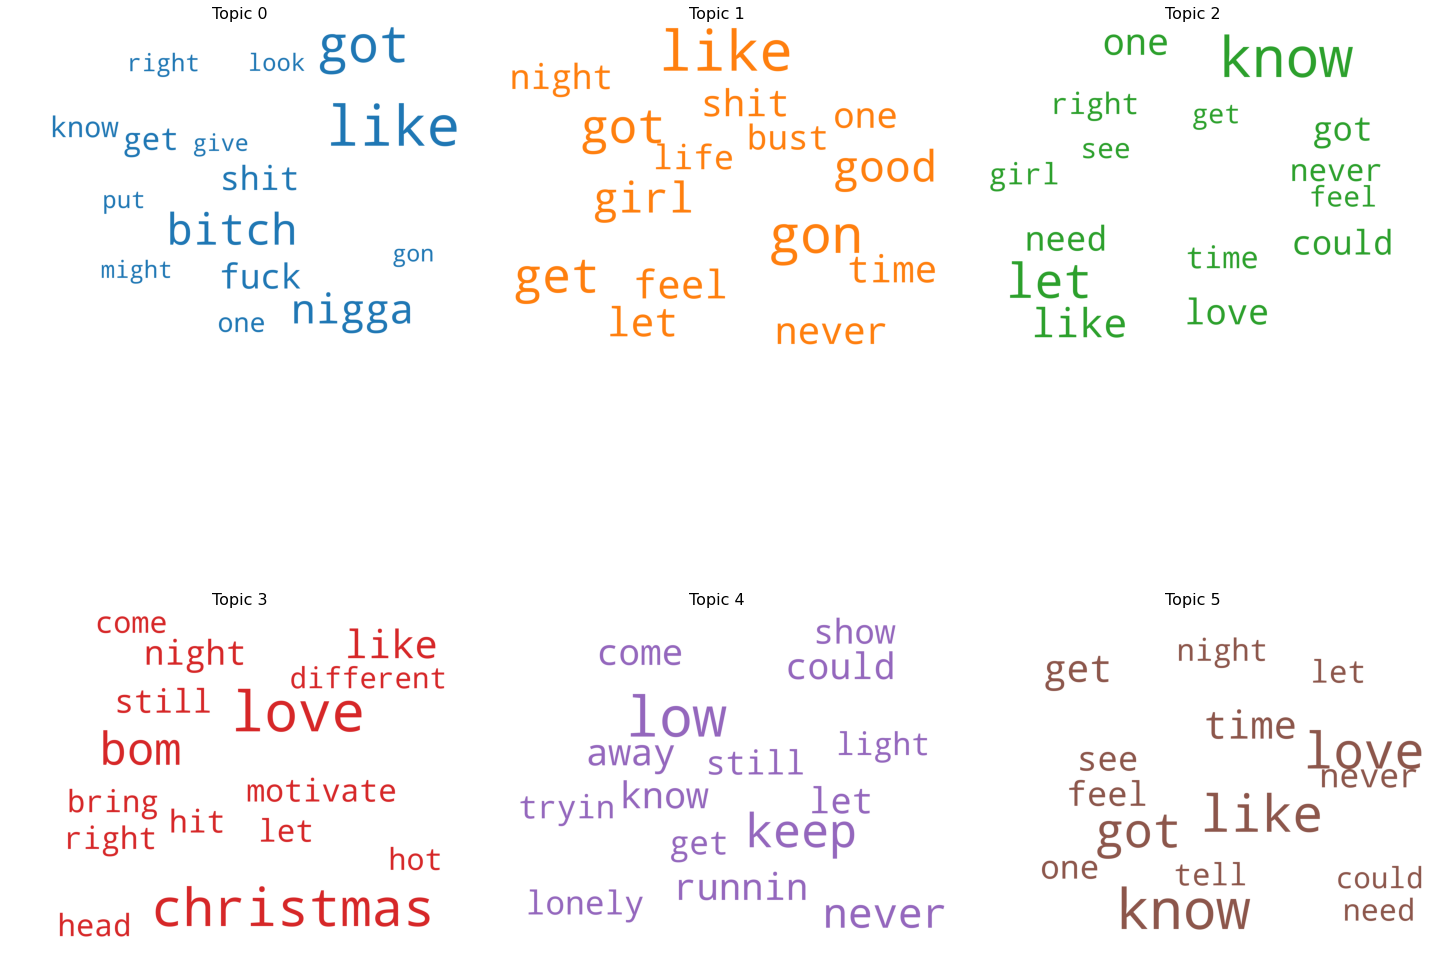

In [ ]:
gen_topic_clouds(topic_words)

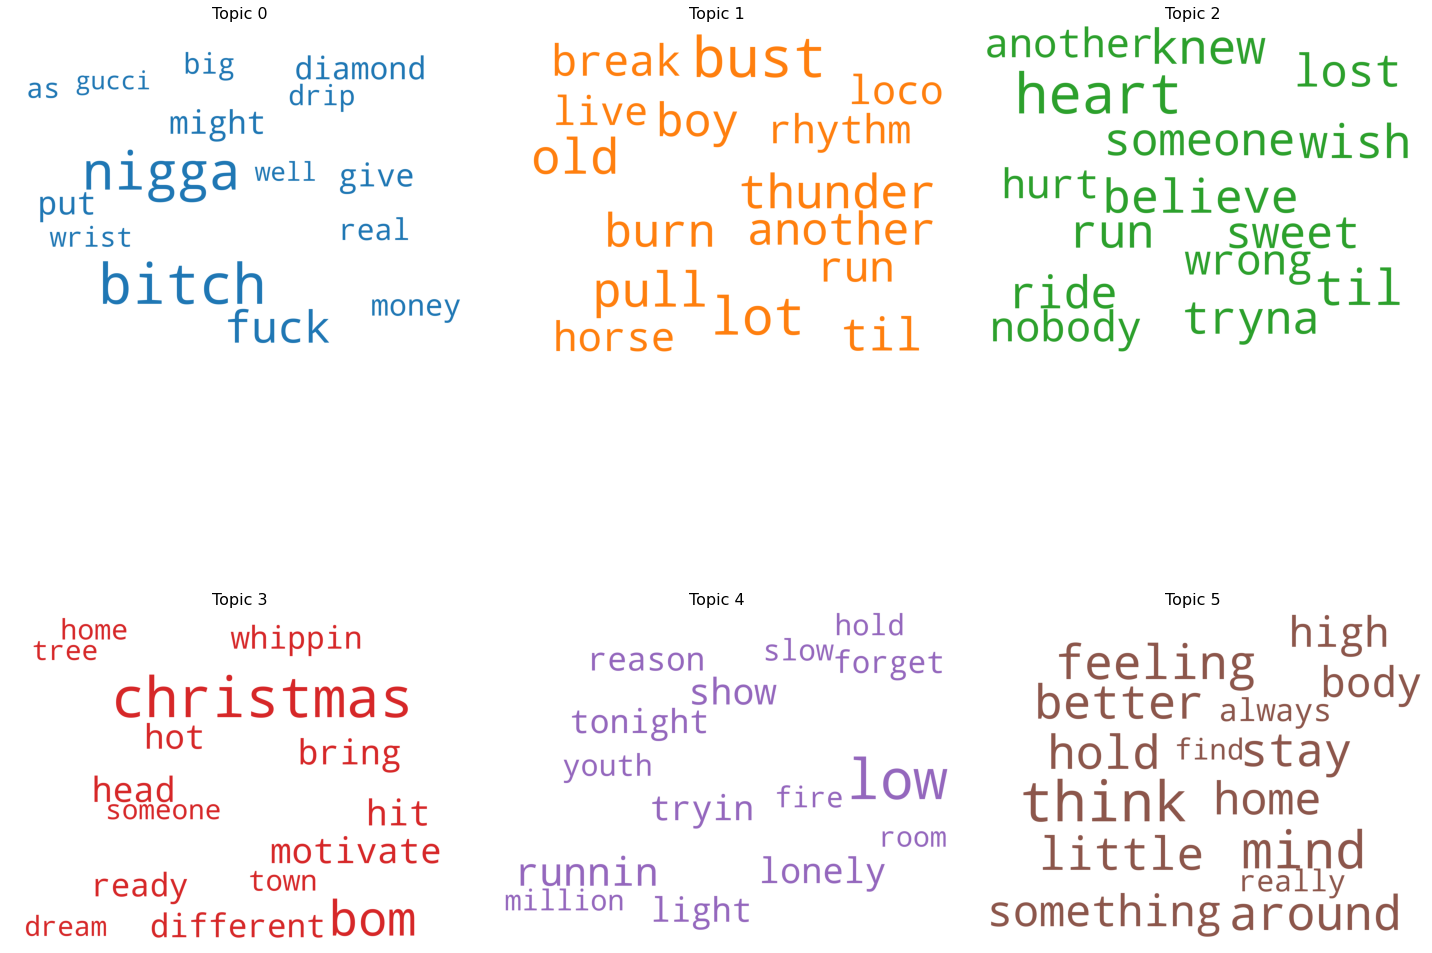

In [ ]:
gen_topic_clouds(cleaned_topic_dicts)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(optimal_model, 
                                lyrics_dtm, 
                                dictionary=optimal_model.id2word)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [ ]:
# concat with songs df
songs_topics_df = pd.concat([songs_df.reset_index(), dominant_topics_df], axis=1)

# format cols
songs_topics_df = songs_topics_df.drop(columns=['Document_No', 'Text'])\
                .rename(columns={'Dominant_Topic': 'topic_no'})

songs_topics_df.columns = [col.lower() for col in songs_topics_df.columns]

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# explore topics
for topic, topic_df in songs_topics_df.groupby('topic_no'):
    print(topic)
    for song in topic_df.lyrics.sample(5):
        print(song)

0.0
I took a pill in Ibiza,To show Avicii I was cool,And when I finally got sober, felt ten years older,But fuck it, it was something to do,,I'm living out in L.A.,I drive a sports car just to prove,I'm a real big baller 'cause I made a million dollars,And I spend it on girls and shoes,,But you don't wanna be high like me,Never really knowing why like me,You don't ever wanna step off that roller coaster and be all alone,You don't wanna ride the bus like this,Never knowing who to trust like this,You don't wanna be stuck up on that stage singing,Stuck up on that stage singing,,All I know are sad songs, sad songs,Darling, all I know are sad songs, sad songs
Oh, that's London On Da Track, run that shit back,(We got London On Da Track),,Swervin',How you look so perfect on your worst days?,Double C your purses, you deserve it,Niggas in your DM, they be thirsty (thirsty),And in person,But you're curvin',Curvy little body, love your surface (surface),Yeah, I'm all on your body, make you nervou

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# map topic no to topic name
topic_name_map = {
    0: 'weatlh',
    1: 'anger',
    2: 'uncertain_love',
    3: 'hope',
    4: 'sadness',
    5: 'romantic_love',
}

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# get topic composition of each song


tc_list = []
for tc in optimal_model[lyrics_dtm]:
    tc_dict = {k: 0 for k in range(optimal_n_topics)}
    new_tc_dict = dict(tc)
    tc_dict.update(new_tc_dict)
    tc_list.append(tc_dict)

rmp_tc_list = []
for tc_dict in tc_list:
    rmp_tc_dict = {topic_name_map[n]: val for n, val in tc_dict.items()}
    rmp_tc_list.append(rmp_tc_dict)


rmp_tc_list

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'weatlh': 0,
  'anger': 0,
  'uncertain_love': 0,
  'hope': 0,
  'sadness': 0,
  'romantic_love': 0.9745642},
 {'weatlh': 0,
  'anger': 0,
  'uncertain_love': 0,
  'hope': 0,
  'sadness': 0,
  'romantic_love': 0.98379976},
 {'weatlh': 0,
  'anger': 0.11816485,
  'uncertain_love': 0,
  'hope': 0,
  'sadness': 0,
  'romantic_love': 0.85596514},
 {'weatlh': 0,
  'anger': 0,
  'uncertain_love': 0.97533494,
  'hope': 0,
  'sadness': 0,
  'romantic_love': 0},
 {'weatlh': 0,
  'anger': 0,
  'uncertain_love': 0.16468936,
  'hope': 0,
  'sadness': 0,
  'romantic_love': 0.81667686},
 {'weatlh': 0,
  'anger': 0,
  'uncertain_love': 0,
  'hope': 0,
  'sadness': 0.8047685,
  'romantic_love': 0.1735649},
 {'weatlh': 0,
  'anger': 0,
  'uncertain_love': 0,
  'hope': 0,
  'sadness': 0,
  'romantic_love': 0.9844348},
 {'weatlh': 0,
  'anger': 0.1317628,
  'uncertain_love': 0,
  'hope': 0,
  'sadness': 0,
  'romantic_love': 0.84240997},
 {'weatlh': 0,
  'anger': 0,
  'uncertain_love': 0,
  'hope': 0.1

In [ ]:
# list of topic comp dicts to df
topic_comp_df = pd.DataFrame(rmp_tc_list)
topic_cols = ['topic_'+ topic_name for topic_name in topic_comp_df.columns]
topic_comp_df.columns = topic_cols
topic_comp_df

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_weatlh  topic_anger  topic_uncertain_love  topic_hope  \
0              0.0     0.000000              0.000000      0.0000   
1              0.0     0.000000              0.000000      0.0000   
2              0.0     0.118165              0.000000      0.0000   
3              0.0     0.000000              0.975335      0.0000   
4              0.0     0.000000              0.164689      0.0000   
...            ...          ...                   ...         ...   
1624           0.0     0.000000              0.961810      0.0000   
1625           0.0     0.117883              0.864856      0.0000   
1626           0.0     0.139401              0.839606      0.0000   
1627           0.0     0.000000              0.551050      0.4343   
1628           0.0     0.000000              0.975268      0.0000   

      topic_sadness  topic_romantic_love  
0               0.0             0.974564  
1               0.0             0.983800  
2               0.0             0.855965  
3               0.0             0.000000  
4               0.0             0.816677  
...             ...                  ...  
1624            0.0             0.000000  
1625            0.0             0.000000  
1626            0.0             0.000000  
1627            0.0             0.000000  
1628            0.0             0.000000  

[1629 rows x 6 columns]

In [ ]:
# concat to og df
songs_topics_comp_df = pd.concat([songs_topics_df, topic_comp_df], axis=1)

# write to csv
songs_topics_comp_df.to_csv('Data/spotify_sg_topics_5.csv', index=False)
songs_topics_comp_df.head()

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


song_id  popularity                 title  \
0  5xhJmd0I15jFcEdqxfCzKk       914.6       it wont kill ya   
1  0wJJhRgdHhT93Z3iWdMB0T        45.6                  hymn   
2  7nAfXgeHfDO50upcOjJOaq       935.7     talking to myself   
3  0kN8xEmgMW9mh7UmDYHlJP     46293.6  versace on the floor   
4  4PkIDTPGedm0enzdvilLNd      5227.4               sixteen   

                      artist album/single  artist_followers  explicit  \
0  The Chainsmokers - Louane        album          16931568         0   
1                      Kesha       single           5910376         0   
2                Linkin Park        album          17132813         0   
3                 Bruno Mars        album          27355260         0   
4             Ellie Goulding       single           8604850         0   

                    album release_date  danceability  ...  \
0  Memories...Do Not Open   2017-04-07         0.572  ...   
1                    Hymn   2017-08-03         0.488  ...   
2          One More Light   2017-05-19         0.593  ...   
3               24K Magic   2016-11-17         0.578  ...   
4                 Sixteen   2019-04-12         0.669  ...   

                                         tokens_desc  topic_no  \
0                               much, little, longer       5.0   
1  quite, pretty, reckless, pretty, wild, front, ...       5.0   
2                                                NaN       5.0   
3                      alone, inside, right, anymore       2.0   
4                        small, suddenly, busy, good       5.0   

   topic_perc_contrib                                           keywords  \
0              0.9746   know,  like,  love,  got,  time,  get,  see, ...   
1              0.9838   know,  like,  love,  got,  time,  get,  see, ...   
2              0.8559   know,  like,  love,  got,  time,  get,  see, ...   
3              0.9753   know,  let,  like,  one,  love,  need,  could...   
4              0.8167   know,  like,  love,  got,  time,  get,  see, ...   

   topic_weatlh  topic_anger  topic_uncertain_love  topic_hope  topic_sadness  \
0           0.0     0.000000              0.000000         0.0            0.0   
1           0.0     0.000000              0.000000         0.0            0.0   
2           0.0     0.118165              0.000000         0.0            0.0   
3           0.0     0.000000              0.975335         0.0            0.0   
4           0.0     0.000000              0.164689         0.0            0.0   

   topic_romantic_love  
0             0.974564  
1             0.983800  
2             0.855965  
3             0.000000  
4             0.816677  

[5 rows x 38 columns]

In [ ]:
# dominant topic counts by genre

topic_counts_by_genre_df = songs_topics_comp_df.groupby(['genre', 'topic_no']).song_id.count().reset_index()
topic_counts_by_genre_df['topic_no'] = topic_counts_by_genre_df['topic_no'].map(topic_name_map)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def create_radars(row, title, color, feature_list, df):
     
    # init num of dimensions
    k = len(feature_list)

    # init angles of axes ()
    angles = [n / float(k) * 2 * math.pi for n in range(k)]
    angles += angles[:1]

    # init radar chart
    ax = plt.subplot(10,3,row+1, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], feature_list, color='grey', size=8)
    ax.tick_params(axis='both', which='major', pad=15)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.0, 0.5, 1], ["0.0","0.5", "1"], color="grey", size=7)
    plt.ylim(0,1)
    
    # Set starting index
    values = df.iloc[row].tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.2)



C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# topic composition by genre
topic_comp_by_genre_df = songs_topics_comp_df.groupby('genre')[topic_cols].mean().reset_index()

# normalize to accentuate shape of distribution
normal_topic_comp_by_genre_df = topic_comp_by_genre_df
normal_topic_comp_by_genre_df[topic_cols] = normal_topic_comp_by_genre_df[topic_cols].apply(lambda g: g/g.max(), axis=1)
normal_topic_comp_by_genre_df

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


genre  topic_weatlh  topic_anger  topic_uncertain_love  \
0          boy band      0.080510     0.053261              0.177337   
1  dance/electronic      0.128286     0.104740              0.313099   
2           hip hop      0.701590     0.390831              0.308289   
3             house      0.071069     0.083651              0.416551   
4             indie      0.207667     0.203261              0.521739   
5             metal      0.146250     0.294706              1.000000   
6               pop      0.141436     0.147203              0.324784   
7          r&b/soul      0.144549     0.113811              0.399799   
8               rap      0.838053     0.433003              0.391301   
9              rock      0.313597     0.450663              0.586845   

   topic_hope  topic_sadness  topic_romantic_love  
0    0.115280       0.082473             1.000000  
1    0.036329       0.036141             1.000000  
2    0.076992       0.106808             1.000000  
3    0.061306       0.062198             1.000000  
4    0.030713       0.066763             1.000000  
5    0.055667       0.409813             0.993194  
6    0.077996       0.102865             1.000000  
7    0.062074       0.100178             1.000000  
8    0.185058       0.122519             1.000000  
9    0.198745       0.134324             1.000000

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


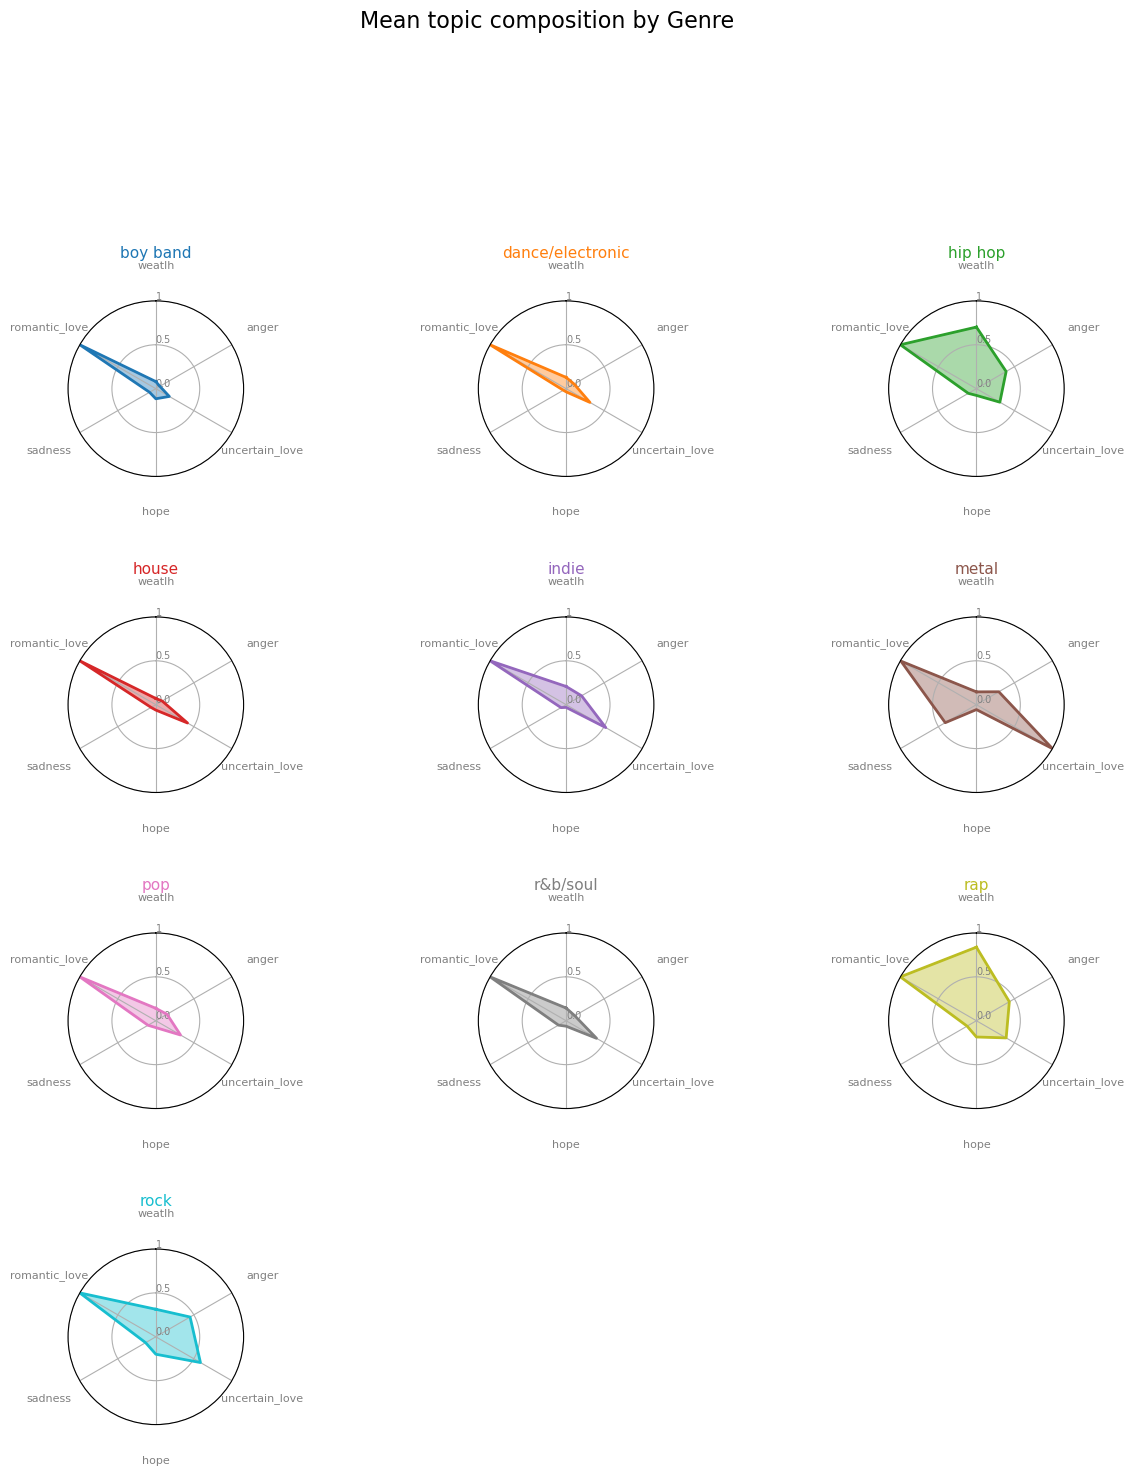

In [ ]:
genres = topic_comp_by_genre_df['genre']

# initialize the figure
my_dpi=100
plt.figure(figsize=(1500/my_dpi, 4000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace = .8)
plt.suptitle(f'Mean topic composition by Genre', y=.95, fontsize=16, va='center')

# Create a color palette
my_palette = plt.cm.get_cmap("tab10") 

# feature list
topic_name_list = [topic_name_map[topic_no] for topic_no in range(6)]

# Loop to plot
for row in range(0, len(topic_comp_by_genre_df.index)):
    create_radars(row=row, 
                title=f'{genres[row]}', 
                color=my_palette(int(row)), 
                feature_list=topic_name_list,
                df=topic_comp_by_genre_df)

plt.show()